In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

%metal_heading Welcome to Qiskit Metal!

In [3]:
design = designs.DesignPlanar()

In [4]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

06:32AM 24s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Populating font family aliases took 219 ms. Replace uses of missing font family "Courier" with one that exists to avoid this cost. 



In [5]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Create a new qcomponent object with name 'Q1'
q1 = TransmonPocket(design, 'Q1')
gui.rebuild()  # rebuild the design and plot

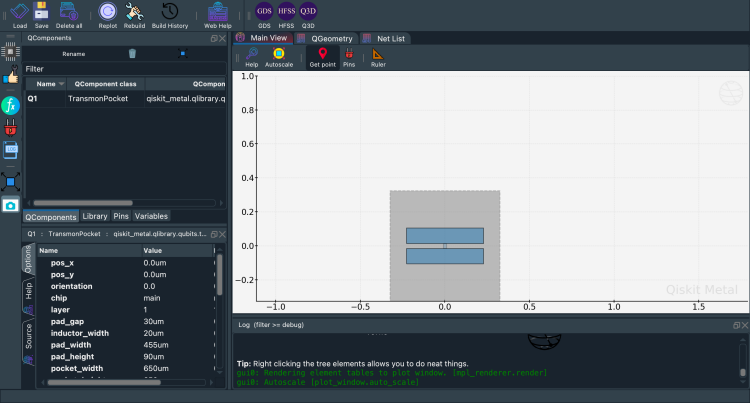

In [6]:
# save screenshot
gui.edit_component('Q1')
gui.autoscale()
gui.screenshot()

In [7]:
 # Closing the Qiskit Metal GUI
gui.main_window.close()

True

# Test for 3D designs

In [4]:
# Import necessary Qiskit Metal modules
from qiskit_metal import designs, MetalGUI
from qiskit_metal.qlibrary.core import QComponent
from qiskit_metal import draw

LineString = draw.LineString
import numpy as np

# Define a custom Qiskit Metal component for the inverted CPW
# Define a custom Qiskit Metal component for the inverted CPW
class InvertedCPWStraight(QComponent):
    """
    Creates an inverted CPW straight section where only the gaps are metal.

    In this design, the central "trace" area and the outer "ground" areas
    are empty space (no metal). The regions that would normally be the gaps
    are filled with metal.

    Parameters:
        trace_width (float): The width of the central empty space. This
                             corresponds to the width of the area where the
                             central conductor would normally be, but here it's empty.
        gap_width (float): The width of the two parallel metal lines. These
                           lines represent the "gaps" that are now filled with metal.
        length (float): The total length of the inverted CPW section.
        layer (int): The fabrication layer on which the metal will be placed.
    """
    # Define default options for the component
    default_options = dict(
        trace_width='10um',  # Default width of the central empty space
        gap_width='5um',     # Default width of the metal "gap" lines
        length='200um',      # Default length of the section
        layer='1'            # Default layer for the metal
    )

    def make(self):
        """
        Generates the QGeometry for the inverted CPW section.
        This method is called by Qiskit Metal when the component is added to a design.
        """
        p = self.p  # Access component parameters (parsed from default_options and user input)

        # Convert parameters to numerical values (they are strings by default)
        trace_width = p.trace_width
        gap_width = p.gap_width
        length = p.length
        layer = p.layer

        # Calculate the Y-coordinates for the centerlines of the two metal "gap" strips.
        # The total width of the structure from outer edge of one metal strip to the other
        # is (gap_width / 2) + (trace_width / 2) + (trace_width / 2) + (gap_width / 2)
        # = gap_width + trace_width.
        # The center of the lower strip will be at -(half of the empty space + half of the gap width)
        y_center_lower_gap = -(trace_width / 2 + gap_width / 2)
        # The center of the upper strip will be at +(half of the empty space + half of the gap width)
        y_center_upper_gap = (trace_width / 2 + gap_width / 2)

        # Define the X-coordinates for the start and end of the straight section.
        # We center the component at (0,0) for simplicity.
        x_start = -length / 2
        x_end = length / 2

        # Create the LineString objects for the two metal "gap" strips.
        # In newer Qiskit Metal versions, the width is passed directly to add_qgeometry.

        # 1. Lower metal "gap" strip
        # Define the centerline of the lower strip
        line_lower = LineString([(x_start, y_center_lower_gap), (x_end, y_center_lower_gap)])
        # Add the generated QGeometry to the component, specifying the width here.
        self.add_qgeometry('path', {'gap_lower_metal': line_lower}, layer=layer, width=gap_width)

        # 2. Upper metal "gap" strip
        # Define the centerline of the upper strip
        line_upper = LineString([(x_start, y_center_upper_gap), (x_end, y_center_upper_gap)])
        # Add the generated QGeometry to the component, specifying the width here.
        self.add_qgeometry('path', {'gap_upper_metal': line_upper}, layer=layer, width=gap_width)


In [ ]:
# --- Main script to demonstrate usage ---
# This part shows how to initialize a Metal design and add your custom component.

# 1. Create a Qiskit Metal design object.
design = designs.DesignPlanar()
# Enable overwriting existing components if names clash, useful for iterative design.
design.overwrite_enabled = True
# Set the design units, e.g., micrometers (um).
# design.set_units('um') # Corrected: Use set_units() instead of parse_options()

# 2. Add an instance of your custom InvertedCPWStraight component to the design.
# You can customize the options here to change its dimensions.
inverted_cpw_section = InvertedCPWStraight(
    design,
    'my_inverted_cpw_example', # A unique name for this component instance in the design
    options=dict(
        trace_width='0um',  # This will be the width of the empty space in the middle
        gap_width='10um',    # This will be the width of each metal line (the "gaps")
        length='500um',      # The total length of the straight section
        layer='1'            # Place it on layer 1
    )
)


gui = MetalGUI(design)
gui.rebuild() # Rebuild the design to generate the QGeometry based on component definitions


03:26PM 17s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x17af9d290> contents scale of 2 - updating layer to match.

03:26PM 17s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Back buffer dpr of 2 doesn't match <NSViewBackingLayer: 0x17af9d290> contents scale of 1 - updating layer to match.

03:27PM 10s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Back buffer dpr of 2 doesn't match <NSViewBackingLayer: 0x17af9d290> contents scale of 1 - updating layer to match.

03:27PM 10s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x17af9d290> contents scale of 2 - updating layer to match.

03:27PM 11s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x17af9d290> contents scale of 2 - u

: 

In [6]:
gui.main_window.close()  # Close the GUI window if needed

True

# TODO
- need to merge two components if width between them is 0 
- how to do curve edges
- how to change directions 

then we are goo dto go for conversion
